# EDA on Simulated Data

## Goal
Understand how different dog features and environmental conditions in the simulated data affect core body temperature (CBT) and heat risk to identify which factors are important for predicting CBT and detecting heat stress.

## Objectives
* Inspect dataset structure
* Summarize feature distribution
* Identify outliers and skews 
* Calculate feature importance
* Identify feature interactions
* Univariate & Bivariate analysis

## Datasets
* Main Dataset: FullSimDF.csv
* Other Reference Datasets:
   * breed_traits_long.csv
   * breed_traits_long.csv
   * breed_traits.csv
   * trait_descriptions.csv
   * breed_rank.csv
   * dogs_dataset.csv
   * dogs_dataset_EDA.csv

In [117]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder # converts labels into numbers
from sklearn.feature_selection import mutual_info_regression # for feature importance

## Inspect Dataset Structure
* Check for missing values
* Identify numerical, categorical, and boolean features

### Preview Data and Check for Missing Values

In [118]:
# load simulated dataset
df = pd.read_csv("FullSimDF.csv") # read dataset for simulated data
print(f"Simulated Data: \nRows: {df.shape[0]}, Columns: {df.shape[1]}\n") # display rows and cols count
display(df.head()) # preview first five rows of data set

Simulated Data: 
Rows: 9335, Columns: 39



,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,Energy Level,Playfulness Level,is_brachycephalic,...,Hum_Diff,CBT_simulated,is_old,is_overweight,heat_stress_risk,High_humidity_fordogs,prior_heat_related_injury_est,simulated_heat_injury_flag,target2Category,target3Category
0,Rottweiler,7.4,18.2,Female,Gray,Short,Smooth,3.0,4.0,0.0,...,1.73,38.247775,0,0,0,0,0.000,0,0,Normal
1,Poodle,11.3,61.3,Male,Brindle,Long,Curly,4.0,5.0,0.0,...,9.73,39.811340,0,0,0,1,0.022,0,1,Heat Stress
2,Airedale Terrier,10.0,37.5,Male,Merle,Short,Wiry,3.0,3.0,0.0,...,4.71,38.629803,0,0,0,1,0.012,0,0,Normal
3,Havanese,6.5,52.6,Male,Red,Long,Double,3.0,5.0,0.0,...,8.38,39.634108,0,0,0,0,0.002,0,0,Normal
4,Labrador Retriever,5.8,45.4,Female,Black and Tan,Short,Double,5.0,5.0,0.0,...,6.47,39.268502,0,0,0,0,0.022,0,0,Normal


In [119]:
# check for any missing values
if df.isnull().values.any() == False:
    print("No missing values found ✅")
else:
    df.isnull().sum()

No missing values found ✅


### Create Separate Features List

In [120]:
# create summary table
info_df = pd.DataFrame({
    "Data Type": df.dtypes,
    "Non-null Count": df.notnull().sum(),
    "Null Count": df.isnull().sum(),
    "Unique Values": df.nunique()
    
})

# create separate numerical, categorical, and boolean attributes list
numeric_cols = df.select_dtypes(include=["int64","float64"])
numeric_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns.tolist()
categorical_cols = df.select_dtypes(include=["str"])
categorical_cols = categorical_cols.loc[:, categorical_cols.nunique() > 2].columns.tolist()
bool_cols = df.columns[df.nunique() == 2].tolist()

# display attributes and attr count for each list
print(f"\nCommon Data Type: {info_df["Data Type"].mode()[0]}") # displays the common data type amongst columns
print(f"\nNumeric Attributes: {", ".join(numeric_cols)}") # lists columns that are numeric
print(f"\nNumeric Attributes Count: {len(numeric_cols)}")
print(f"\nCategorical Attributes: {", ".join(categorical_cols)}") # lists columns are that categorical
print(f"\nNumeric Attributes Count: {len(categorical_cols)}")
print(f"\nBoolean Attributes: {", ".join(bool_cols)}") # lists columns that are boolean (0/1 or true/false)
print(f"\nNumeric Attributes Count: {len(bool_cols)}")

# display summary table
info_df


Common Data Type: float64

Numeric Attributes: Age, Weight, Energy Level, Playfulness Level, Sun Exposure, Wind Cooling Effect, Station_Temp, Station_Humidity, Ambient_Temp, Ambient_Humidity, T_device, H_device, breed_wt_mu, breed_wt_sd, ideal_weight, pct_of_ideal, BCS_cont, BCS, Temp_Diff, Hum_Diff, CBT_simulated, prior_heat_related_injury_est

Numeric Attributes Count: 22

Categorical Attributes: Breed, Color, Coat Length, Coat Type, size_category, Season, target3Category

Numeric Attributes Count: 7

Boolean Attributes: Gender, is_brachycephalic, Spayed/Neutered, Indoor/Outdoor, is_old, is_overweight, heat_stress_risk, High_humidity_fordogs, simulated_heat_injury_flag, target2Category

Numeric Attributes Count: 10


,Data Type,Non-null Count,Null Count,Unique Values
Breed,str,9335,0,46
Age,float64,9335,0,256
Weight,float64,9335,0,842
Gender,str,9335,0,2
Color,str,9335,0,16
Coat Length,str,9335,0,3
Coat Type,str,9335,0,6
Energy Level,float64,9335,0,3
Playfulness Level,float64,9335,0,3
is_brachycephalic,float64,9335,0,2


## Summary Statistics and Feature Distributions
* Calculate statistical summaries 
* Visualize feature distributions
* Identify outliers and skewed distributions
* Identify imbalanced categories

In [121]:
# summary statistics
df.describe(include='all')

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,Energy Level,Playfulness Level,is_brachycephalic,...,Hum_Diff,CBT_simulated,is_old,is_overweight,heat_stress_risk,High_humidity_fordogs,prior_heat_related_injury_est,simulated_heat_injury_flag,target2Category,target3Category
count,9335,9335.000000,9335.000000,9335,9335,9335,9335,9335.000000,9335.000000,9335.000000,...,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335
unique,46,NaN,NaN,2,16,3,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Doberman Pinscher,NaN,NaN,Female,Red,Short,Smooth,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
freq,470,NaN,NaN,4746,634,5087,4289,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8151
mean,NaN,7.399721,32.184821,NaN,NaN,NaN,NaN,3.839100,4.026352,0.170862,...,5.997905,39.130034,0.131441,0.299625,0.495126,0.298232,0.023153,0.023139,0.126834,NaN
std,NaN,4.045858,15.839744,NaN,NaN,NaN,NaN,0.742243,0.753502,0.376409,...,3.527446,0.583020,0.337900,0.458118,0.500003,0.457507,0.027103,0.150352,0.332805,NaN
min,NaN,-8.600000,-32.000000,NaN,NaN,NaN,NaN,3.000000,3.000000,0.000000,...,-0.920000,37.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,4.700000,21.300000,NaN,NaN,NaN,NaN,3.000000,3.000000,0.000000,...,3.150000,38.722669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,7.400000,32.200000,NaN,NaN,NaN,NaN,4.000000,4.000000,0.000000,...,5.640000,39.113383,0.000000,0.000000,0.000000,0.000000,0.012000,0.000000,0.000000,NaN
75%,NaN,10.200000,42.800000,NaN,NaN,NaN,NaN,4.000000,5.000000,0.000000,...,8.270000,39.520726,0.000000,1.000000,1.000000,1.000000,0.042000,0.000000,0.000000,NaN


### Distribution of Numeric Features

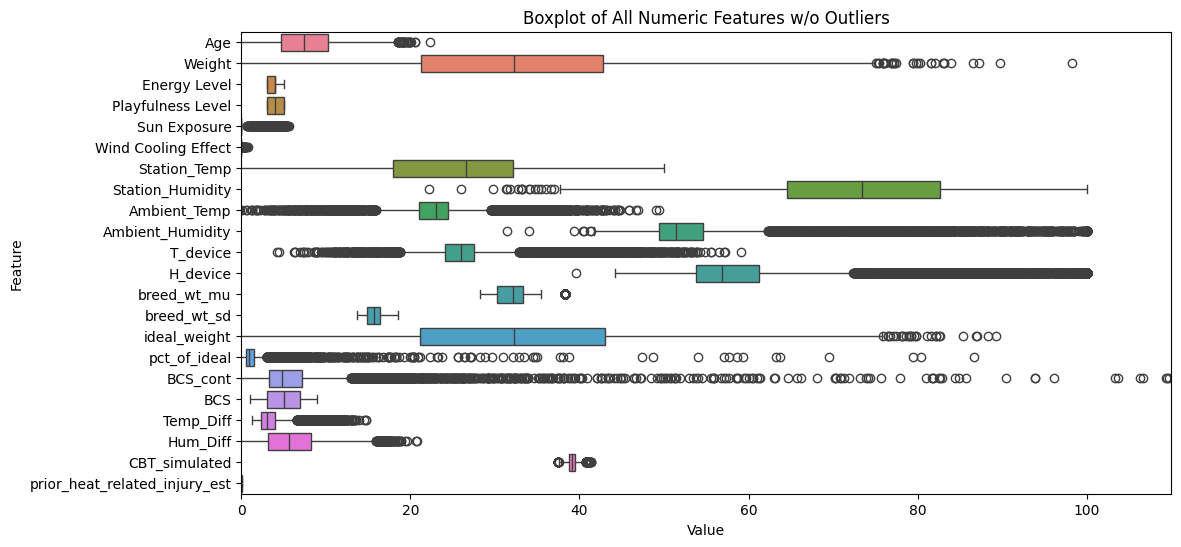

In [122]:
# visualize numeric attributes (w/o outliers)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols], orient="h")

# plot details
plt.xlim(0,110) 
plt.title("Boxplot of All Numeric Features w/o Outliers")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.show()

NOTE: Notable outliers with BCS_cont and pct_of_ideal


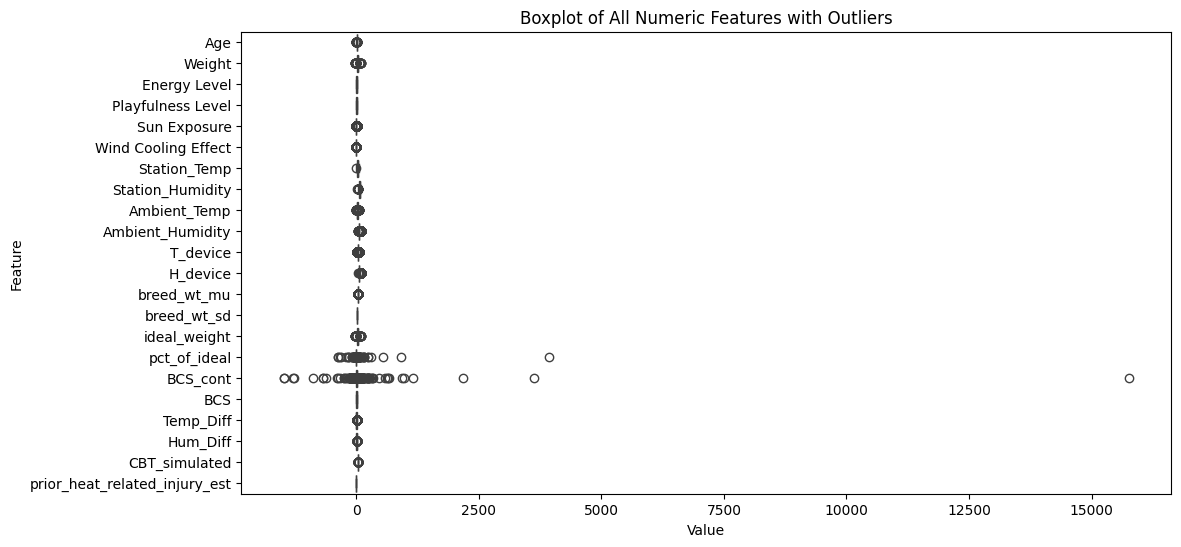

In [123]:
# visualize numeric attributes (w/outliers)
print("NOTE: Notable outliers with BCS_cont and pct_of_ideal")
plt.figure(figsize=(12,6))

# plot details
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Boxplot of All Numeric Features with Outliers")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.show()

In [124]:
# Calculate skewness of numeric attributes
skew_vals = df[numeric_cols].skew().sort_values(ascending=False)
print("Positive value is right skewed and negative value is left skewed\n")
print(skew_vals)

Positive value is right skewed and negative value is left skewed

BCS_cont                         80.023241
pct_of_ideal                     80.023241
Ambient_Humidity                  2.209518
Sun Exposure                      1.910398
H_device                          1.808600
Temp_Diff                         1.754693
T_device                          1.700465
prior_heat_related_injury_est     1.024077
Hum_Diff                          0.706443
breed_wt_mu                       0.479919
breed_wt_sd                       0.467528
Energy Level                      0.267053
Ambient_Temp                      0.240902
BCS                               0.184330
CBT_simulated                     0.179361
Weight                            0.017300
Age                              -0.001701
Station_Humidity                 -0.001717
ideal_weight                     -0.028111
Playfulness Level                -0.043367
Station_Temp                     -0.415622
Wind Cooling Effect            

### Distribution of Categorical Features

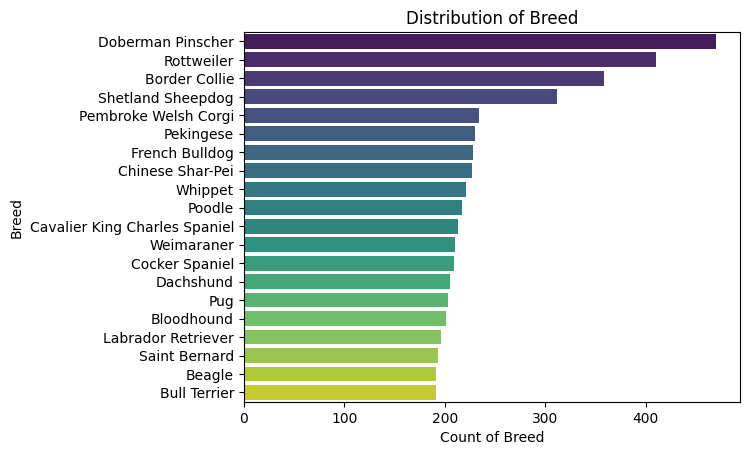

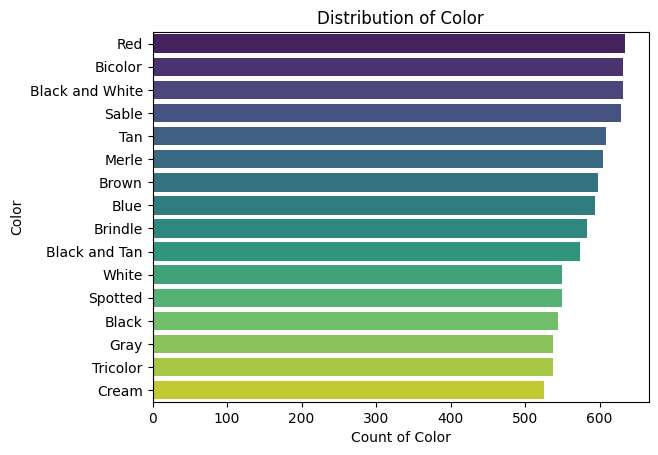

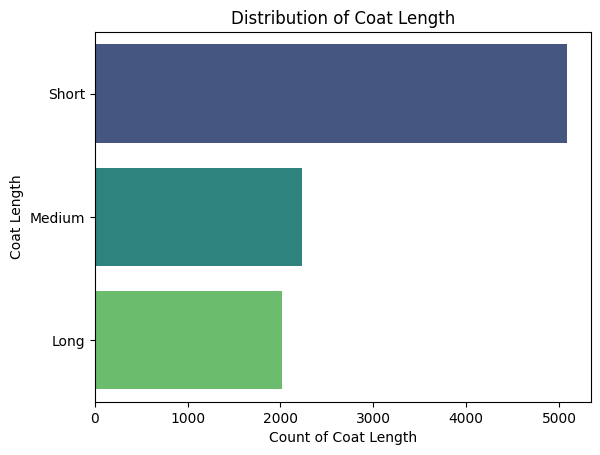

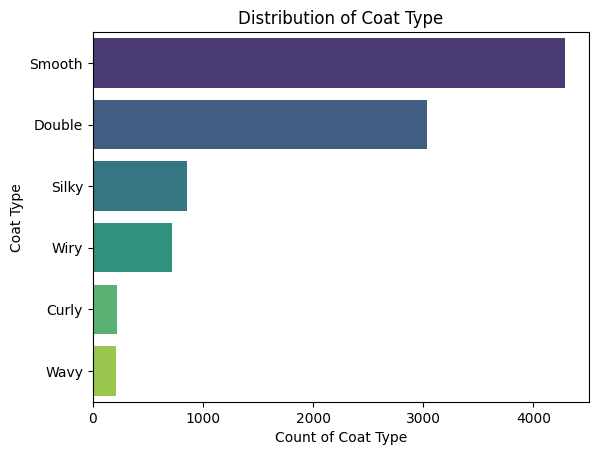

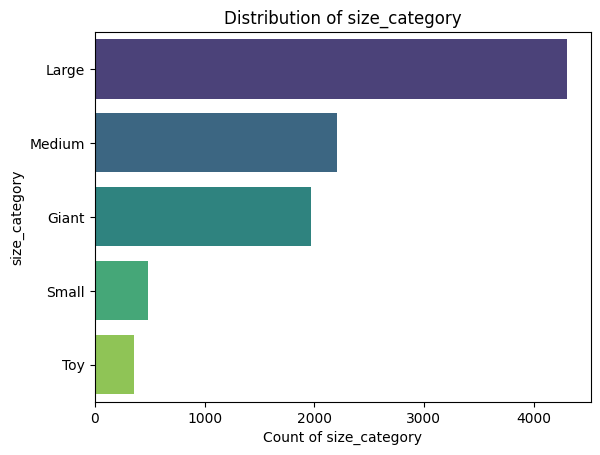

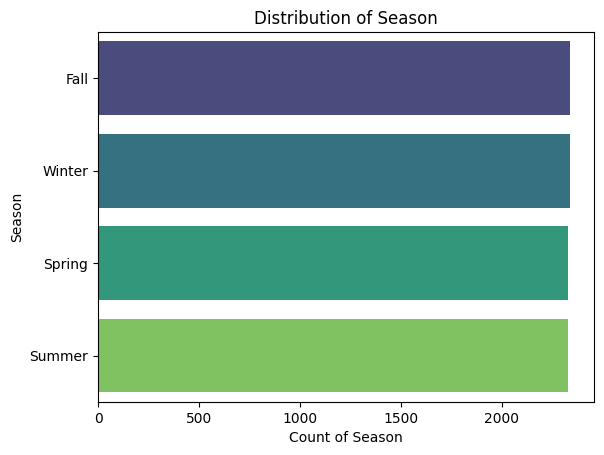

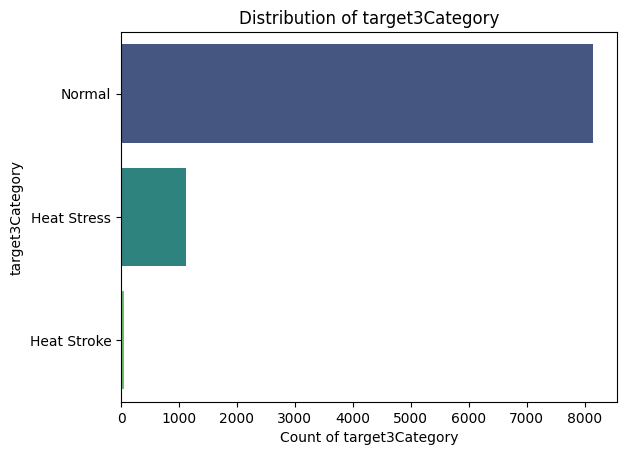

In [134]:
# visualize each categorical attribute's distribution (limited to 20)
for col in categorical_cols:
    top_20 = df[col].value_counts().head(20).index

    # plot details
    sns.countplot(data=df, y=col, order=top_20, palette="viridis", hue=col, hue_order=top_20, legend=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"Count of {col}")
    plt.ylabel(f"{col}")
    plt.show()

### Distribution of Boolean Features

1 - true
0 - false


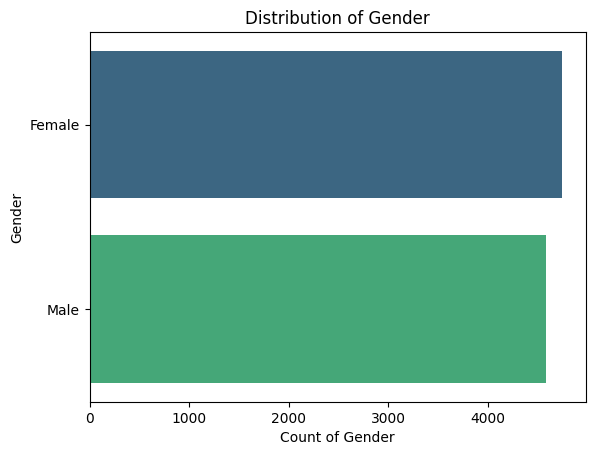

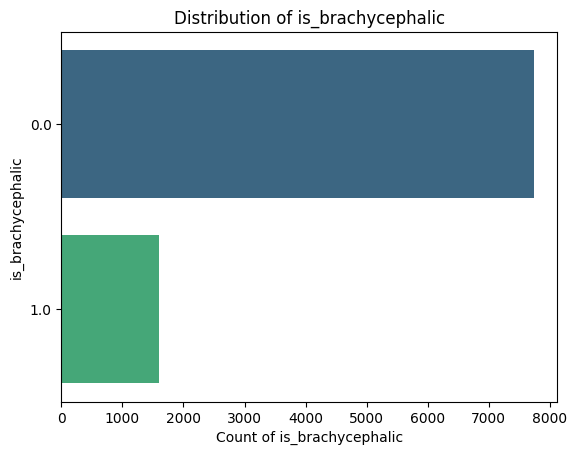

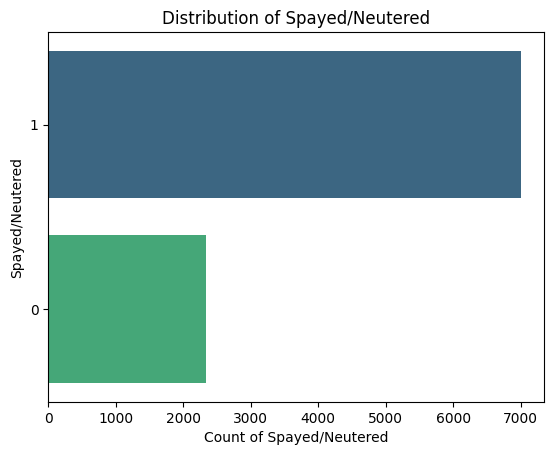

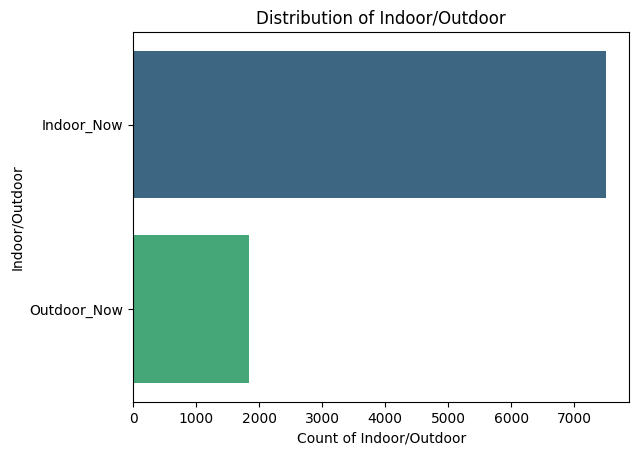

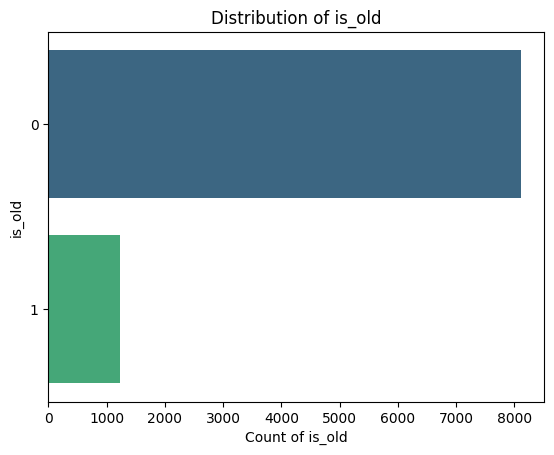

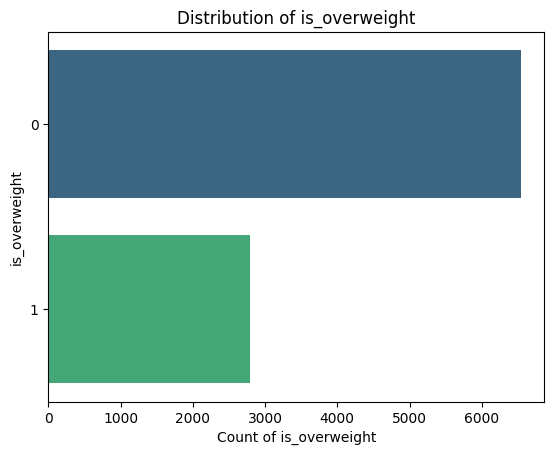

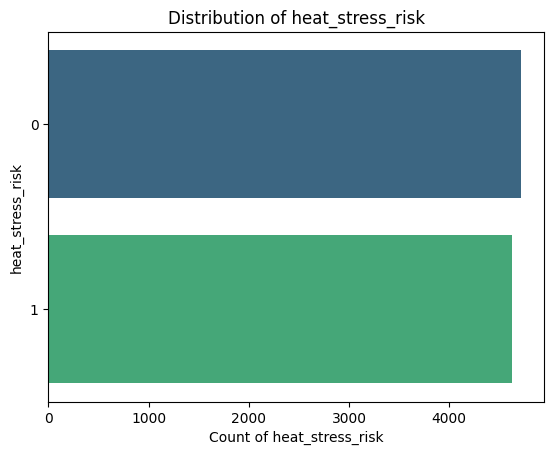

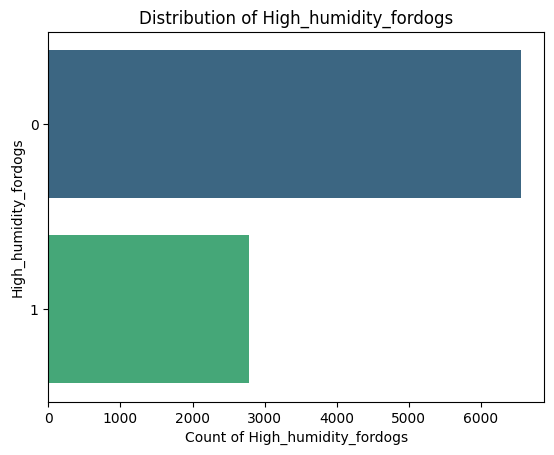

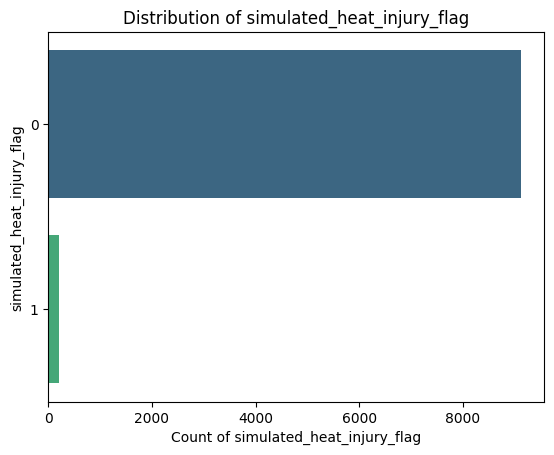

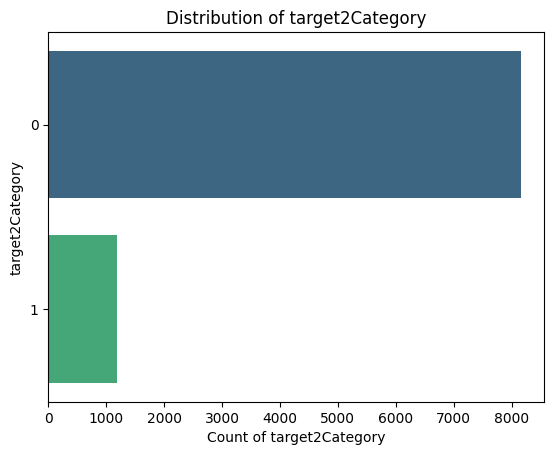

In [126]:
# Visualize each boolean attribute's distribution
print("1 - true\n0 - false")
for col in bool_cols:
    top_20 = df[col].value_counts().head(20).index

    # Plot details
    sns.countplot(data=df, y=col, order=top_20, palette="viridis", hue=col, hue_order=top_20, legend=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"Count of {col}")
    plt.ylabel(f"{col}")
    plt.show()

## Calculate Feature Importance
* All attributes (disregard target variables)
* Internal attributes (biological features of dogs)
* External attributes (environmental features)

### All Features

Attributes with 0 feature impact score:
                 attr  impact_score     type
8   Playfulness Level           0.0  Numeric
9   is_brachycephalic           0.0  Boolean
11    Spayed/Neutered           0.0  Boolean
25       pct_of_ideal           0.0  Numeric
26           BCS_cont           0.0  Numeric


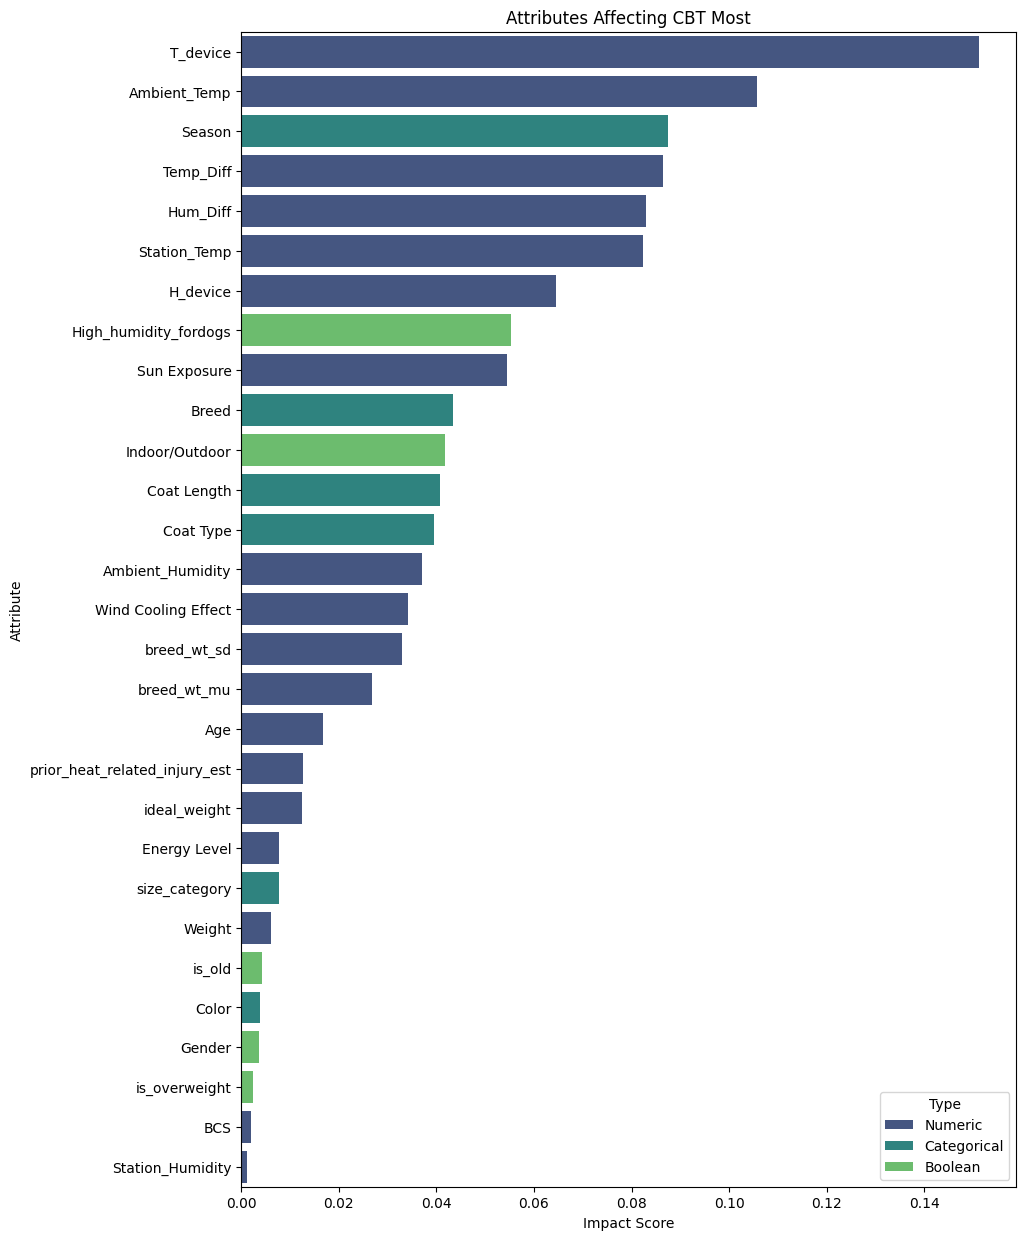

In [127]:
# target features to disregard in dataset
disregard = ["CBT_simulated", "target2Category", "target3Category", "simulated_heat_injury_flag", "heat_stress_risk"]

# split dataset into features and target variable (CBT)
attrs = df.drop(columns=disregard)
cbt = df["CBT_simulated"]

# hold metadata regarding feature type and discrete status
attr_types = []
discrete = [] # needed for mutual information calculation

# copy of features to manipulate w/o altering original data 
attr_copy = attrs.copy()

# convert non-numeric features to numbers, and identify attr type and discrete status
for attr in attrs.columns:
    if attr in categorical_cols:
        attr_types.append("Categorical")
        discrete.append(True)
        # standardize data to strings and convert labels for mathematical processing
        attr_copy[attr] = LabelEncoder().fit_transform(attr_copy[attr].astype(str)) 
    elif attr in bool_cols: 
        attr_types.append("Boolean")
        discrete.append(True)
        # convert flags into 1/0 integers 
        attr_copy[attr] = LabelEncoder().fit_transform(attr_copy[attr])
    else:
        attr_types.append("Numeric")
        discrete.append(False)

# calculate feature importance for all features (higher score = impact CBT more)
feature_importance = mutual_info_regression(attr_copy, cbt, discrete_features=discrete, random_state=1)

# results table with attribute name, impact score, and attribute type 
results = pd.DataFrame({
    "attr": attrs.columns,
    "impact_score": feature_importance,
    "type": attr_types
})

# display attributes with 0 impact score (unrelevant features)
print("Attributes with 0 feature impact score:")
zero_score = results[results["impact_score"] == 0]
print(zero_score)

# display attributes that have a score higher than 0
results = results[results["impact_score"] > 0]
results = results.sort_values(by="impact_score", ascending=False)

# plot details
plt.figure(figsize=(10, 15))
sns.barplot(data=results, x="impact_score", y="attr", hue="type", palette="viridis", dodge=False)
plt.title("Attributes Affecting CBT Most")
plt.ylabel("Attribute")
plt.xlabel("Impact Score")
plt.legend(loc='lower right', title='Type')
plt.show()

### Internal Features

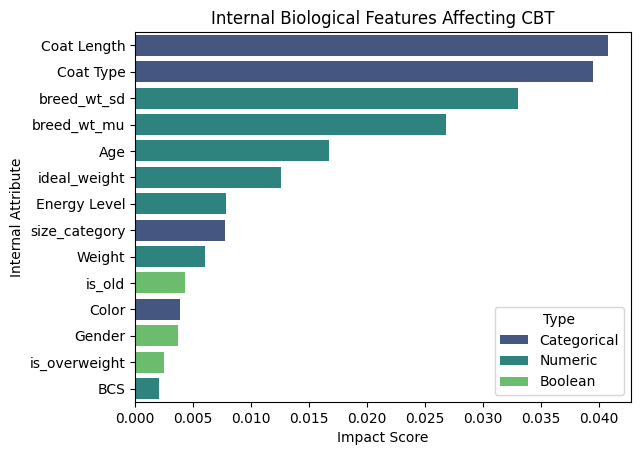

In [128]:
# list of internal biological features
internal_attrs = [
    "Age", "Weight", "Gender", "Color", "Coat Length", "Coat Type", "Energy Level", "Playfulness Level", 
    "is_brachycephalic", "size_category", "Spayed/Neutetred", "breed_wt_mu", "breed_wt_sd", "ideal_weight", 
    "pct_of_ideal", "BCS_cont", "BCS", "is_old", "is_overweight"
]

# filter results to only internal attributes
internal_results = results[results["attr"].isin(internal_attrs)]

# bar chart ranking internal features on their impact on CBT
sns.barplot(data=internal_results, x="impact_score", y="attr", hue="type", palette="viridis", dodge=False)

# plot details
plt.title("Internal Biological Features Affecting CBT")
plt.xlabel("Impact Score")
plt.ylabel("Internal Attribute")
plt.legend(loc='lower right', title='Type')
plt.show()

### External Features

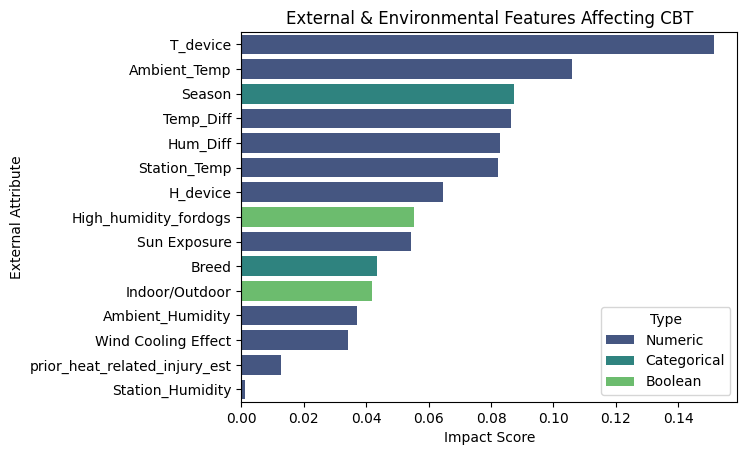

In [129]:
# list of external and environmental features
external_results = results[~results["attr"].isin(internal_attrs)]

# bar chart ranking external features on their impact on CBT
sns.barplot(data=external_results, x="impact_score", y="attr", hue="type", palette="viridis", dodge=False)

# plot details
plt.title("External & Environmental Features Affecting CBT")
plt.xlabel("Impact Score")
plt.ylabel("External Attribute")
plt.legend(loc='lower right', title='Type')
plt.show()

## Feature Interaction (using Heatmap)
* All features
* Only numeric features
* Catergorical and boolean features

### All Features

red - positive correlation
blue - negative correlation


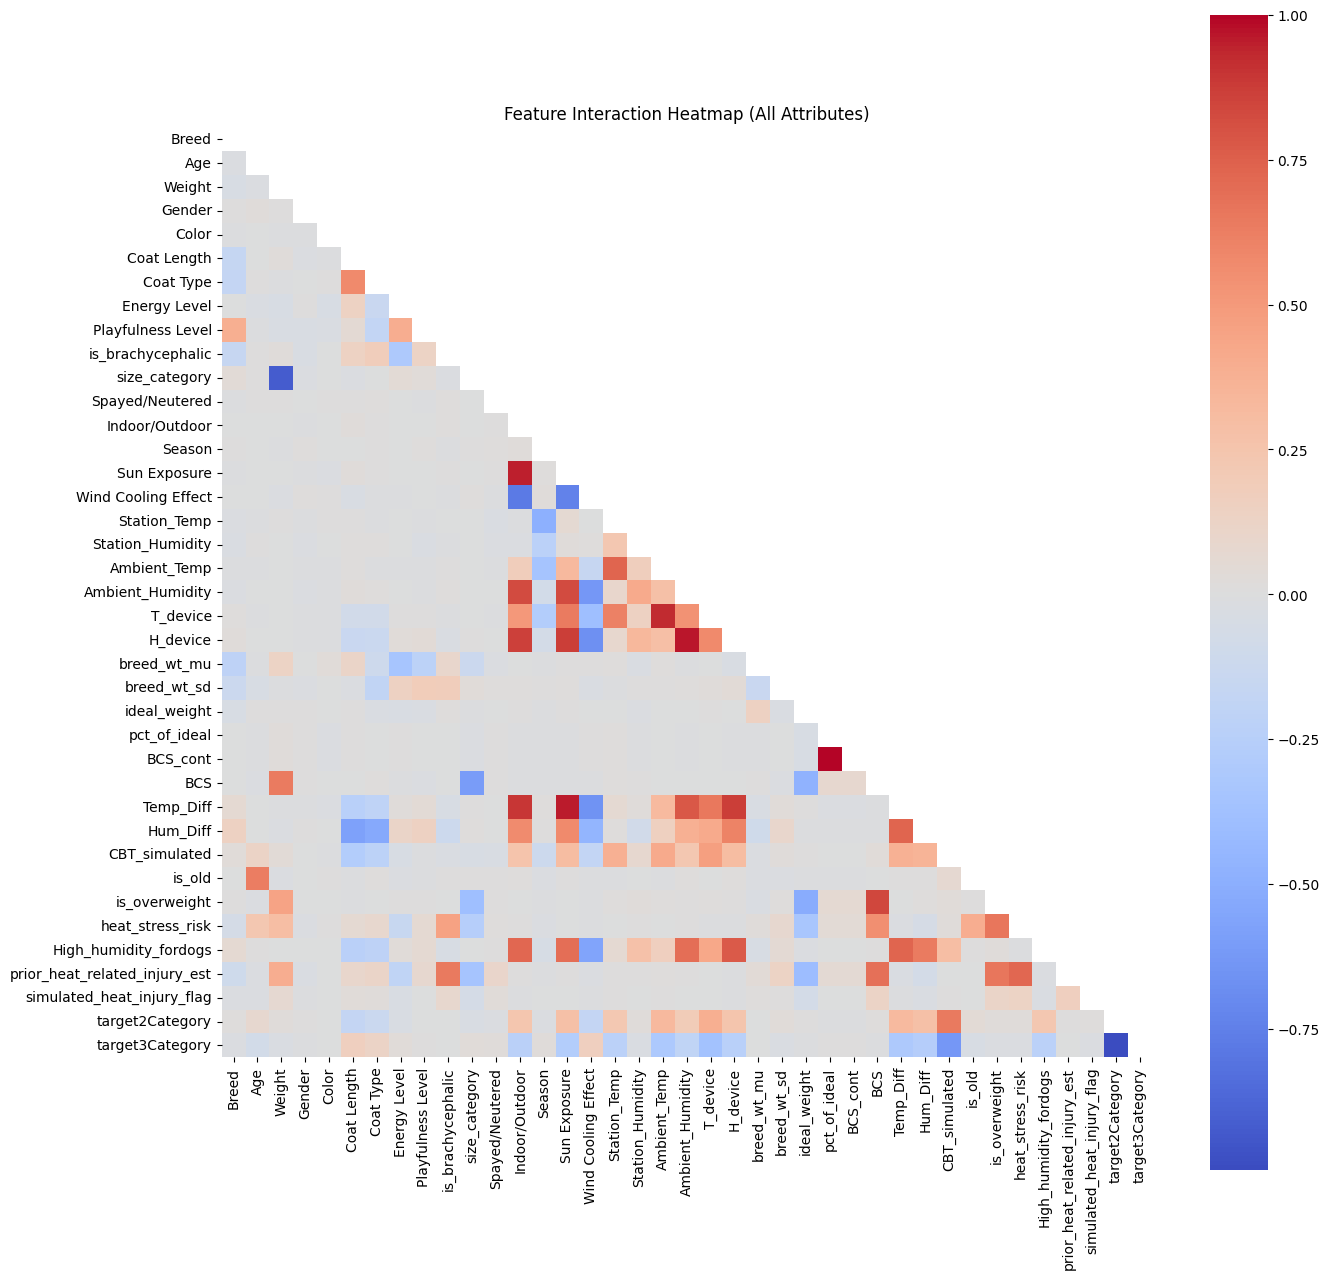

In [130]:
# copy manipulate w/o altering original data
df_all = df.copy()

# convert non-numeric features to numbers for mathematical processing
for col in df_all.columns:
    if col in categorical_cols or col in bool_cols:
        df_all[col] = LabelEncoder().fit_transform(df_all[col].astype(str))

# correlation matrix to show how all features relate to each other
corr_all = df_all.corr()

# mask to hide top half of heatmap since it's dupe info
mask = np.triu(np.ones_like(corr_all, dtype=bool))

# color-coded heatmap to vizualize all relationships strenghts
plt.figure(figsize=(15, 15))
sns.heatmap(corr_all, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", square=True)

# plot details
plt.title("Feature Interaction Heatmap (All Attributes)")
print("red - positive correlation\nblue - negative correlation")
plt.show()

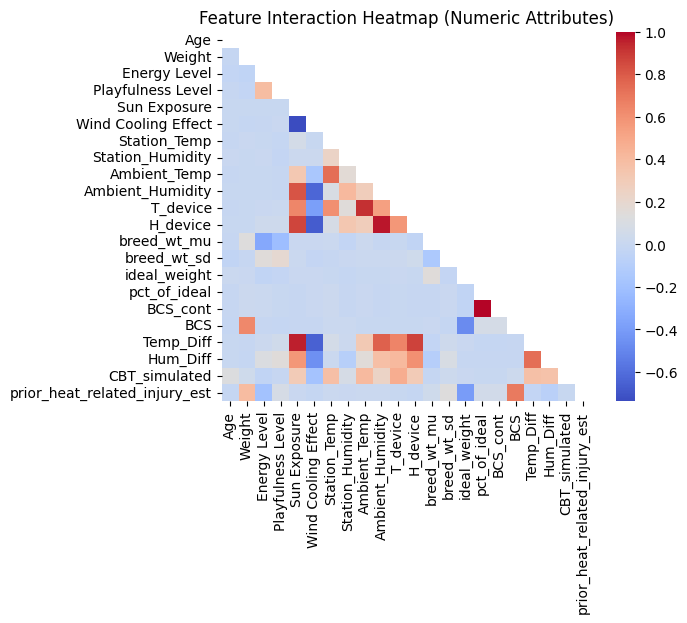

In [131]:
# correlation matrix for numeric features
corr_numeric = df[numeric_cols].corr()

# mask dupe info
mask = np.triu(np.ones_like(corr_numeric, dtype=bool))

# heatmap to visualize numerical relationship strengths
sns.heatmap(corr_numeric, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", square=True)

# plot details
plt.title("Feature Interaction Heatmap (Numeric Attributes)")
plt.show()

### Categorical and Boolean Features

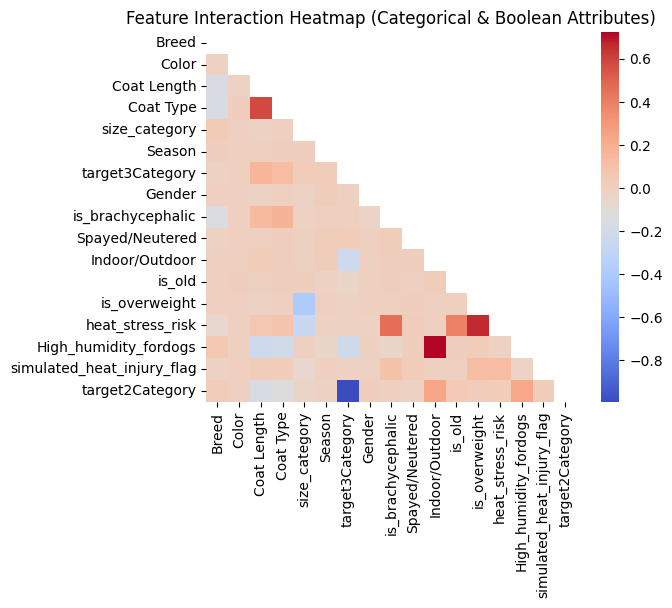

In [132]:
# combined list of categorical and boolean attributes
target_cols = categorical_cols + bool_cols

# copy of only categorical and boolean attributes 
df_target = df[target_cols].copy()

# convert non-numeric features to numbers for mathematical processing
for col in df_target.columns:
    df_target[col] = LabelEncoder().fit_transform(df_target[col].astype(str))

# correlation matrix for categorical and boolean features
corr_target = df_target.corr()

# mask dupe info
mask = np.triu(np.ones_like(corr_target, dtype=bool))

# heatmap to vizualize categorical and boolean relationship strengths
sns.heatmap(corr_target, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", square=True)

# plot details
plt.title("Feature Interaction Heatmap (Categorical & Boolean Attributes)")
plt.show()

## Univariate Analysis
* Target feature (CBT_simulated)
* Risk classification features
* High-impact features

### Target Feature